In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection  import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data= pd.read_csv('/content/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,6339,-2.262193,2.436048,-1.230114,-1.257178,1.999487,3.164989,-0.326910,1.328598,2.010502,...,-0.731751,-1.249195,0.056359,0.847677,0.249961,-0.028339,-0.172882,-0.635326,1.98,0.0
5844,6340,-1.134217,0.166310,1.306848,1.667260,-0.570757,0.814229,2.103197,-0.383550,0.271516,...,-0.153814,-0.043290,0.669085,-0.108929,-0.698489,-0.466839,0.030775,-0.161917,379.63,0.0
5845,6345,-0.865862,0.295617,3.940337,3.606141,-0.672490,1.242731,-0.897963,0.364253,1.896719,...,-0.090057,0.610083,-0.276843,0.387543,0.185369,0.486753,0.210990,-0.056815,21.48,0.0
5846,6345,1.203971,0.927268,0.041463,1.669881,-0.007861,-1.477041,0.300909,-0.418894,1.000914,...,-0.171369,-0.125577,-0.058487,0.751805,0.632035,-0.402436,0.015976,0.058703,1.00,0.0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,...,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000
mean,2595.367818,-0.261963,0.280725,0.843124,0.089948,-0.003169,0.187788,0.019107,-0.041914,0.381580,...,-0.040136,-0.161438,-0.037555,0.028896,0.089814,-0.039693,0.026793,0.005637,65.100371,0.000513
std,1691.596663,1.393228,1.206192,1.024822,1.439625,1.186223,1.359345,1.062982,1.312675,1.044403,...,0.890170,0.647772,0.373349,0.619732,0.406480,0.489281,0.359668,0.258698,193.465557,0.022647
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1135.750000,-1.012439,-0.286978,0.294467,-0.853598,-0.609305,-0.681349,-0.490755,-0.190603,-0.271732,...,-0.258474,-0.594663,-0.187441,-0.348045,-0.151126,-0.400366,-0.049389,-0.017702,4.395000,0.000000
50%,2471.000000,-0.416942,0.343869,0.879825,0.147118,-0.087533,-0.150866,0.044800,0.037795,0.358471,...,-0.109719,-0.177561,-0.047120,0.095822,0.106658,-0.078699,0.016448,0.019429,15.690000,0.000000
75%,3766.000000,1.116368,0.935619,1.497673,1.057136,0.433545,0.599556,0.567276,0.340562,0.938599,...,0.062022,0.273355,0.087544,0.436471,0.354969,0.249251,0.156264,0.082578,56.705000,0.000000
max,6347.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


In [ ]:
data.isnull().sum().sum()

5

In [ ]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.93 % of the dataset
Frauds 0.05 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

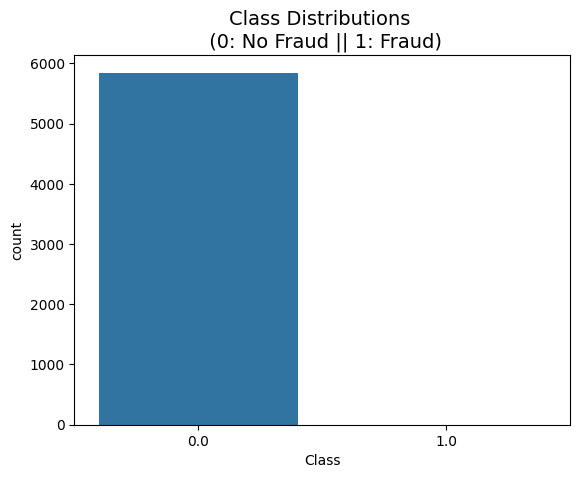

In [ ]:
sns.countplot(x='Class',data = data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [ ]:
tmp = data[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

In [ ]:
class_0.describe()

count    5844.000000
mean       65.002214
std       193.404607
min         0.000000
25%         4.397500
50%        15.655000
75%        56.570000
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
class_1.describe()

count      3.000000
mean     256.310000
std      264.880121
min        0.000000
25%      119.965000
50%      239.930000
75%      384.465000
max      529.000000
Name: Amount, dtype: float64

In [ ]:
# The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers;
# fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

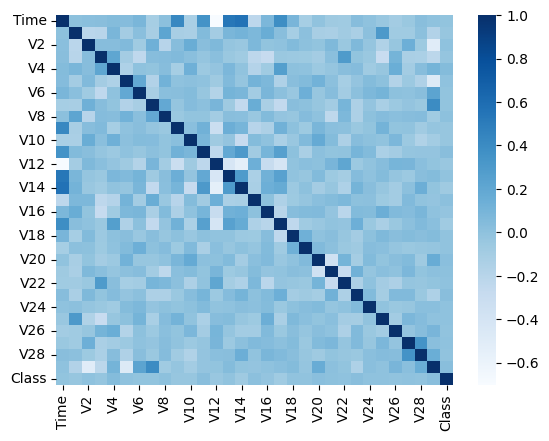

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="Blues")
plt.show()

In [ ]:
X = data.drop("Class", axis=1)
y = data['Class']

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.00000000e+00, 7.80191317e-01, 6.75008587e-01, ...,
        6.85623814e-01, 3.71713993e-01, 1.93998519e-02],
       [0.00000000e+00, 9.64380374e-01, 6.89617726e-01, ...,
        6.73572772e-01, 3.76318488e-01, 3.48787607e-04],
       [1.57554750e-04, 7.80296205e-01, 6.20380035e-01, ...,
        6.69652487e-01, 3.66733494e-01, 4.90973662e-02],
       ...,
       [9.99684890e-01, 8.15846189e-01, 6.90887846e-01, ...,
        6.92170185e-01, 3.67111411e-01, 2.78511442e-03],
       [9.99684890e-01, 9.65254835e-01, 7.18114179e-01, ...,
        6.75682875e-01, 3.81978568e-01, 1.29660820e-04],
       [1.00000000e+00, 9.59394983e-01, 6.75381145e-01, ...,
                   nan,            nan,            nan]])

In [ ]:
import numpy as np

print(np.isnan(y).sum())


4


In [ ]:
mask = ~np.isnan(y)
X = X[mask]
y = y[mask]


In [ ]:
from sklearn.model_selection import train_test_split

# Perform train-test split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [ ]:
import pandas as pd

y_train_series = pd.Series(y_train)
print(y_train_series.value_counts())


0.000130    444
0.000648     93
0.000257     85
0.000115     71
0.000000     67
           ... 
0.723240      1
0.648991      1
0.442082      1
0.527919      1
0.854479      1
Name: count, Length: 133766, dtype: int64


In [ ]:
print(y_train.dtype)


float64


In [ ]:
# binning continuous values into discrete categories
bins = [0, 10, 20, 30]  # Adjust bins based on your data
labels = ['low', 'medium', 'high']
y_train_binned = pd.cut(y_train, bins=bins, labels=labels)
y_train_binned = y_train_binned.astype(str)  # Convert to string if needed


In [ ]:
print(X_train.shape)


(140348,)


In [ ]:
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
y_train_series = pd.Series(y_train)
print(y_train_series.value_counts())

1    78832
0    61516
Name: count, dtype: int64


In [ ]:
def evaluate(model):
  model.fit(X_train,y_train)
  pre = model.predict(X_test)

  accuracy = accuracy_score(pre,y_test)
  recall = recall_score(pre,y_test)
  f1 = f1_score(pre,y_test)

  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print("Accuracy : ",accuracy,"Recall : ",recall,"F1 : ",f1)

In [ ]:
model_LR = LogisticRegression()

In [ ]:
#perform cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

clf_lsr_cv = GridSearchCV(model_LR,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 1.0


In [ ]:
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)
if X_test.ndim == 1:
    X_test = X_test.reshape(-1, 1)


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (140348, 1)
Shape of X_test: (35088, 1)
Shape of y_train: (140348,)
Shape of y_test: (35088,)


In [ ]:
from sklearn.linear_model import LogisticRegression

lsr_best = LogisticRegression(penalty='l2', C=1000.0, random_state=42)
lsr_clf = lsr_best.fit(X_train, y_train)


In [ ]:
# Assuming evaluate is a custom function for model evaluation
# Replace 'evaluate' with the actual evaluation method
def evaluate(model, X_test, y_test):
    from sklearn.metrics import accuracy_score, classification_report
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate the model
evaluate(lsr_clf, X_test, y_test)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15380
           1       1.00      1.00      1.00     19708

    accuracy                           1.00     35088
   macro avg       1.00      1.00      1.00     35088
weighted avg       1.00      1.00      1.00     35088



In [ ]:
model_KNN = KNeighborsClassifier()

In [ ]:
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
for k in k_range:
  model_KNN  = KNeighborsClassifier(n_neighbors=k)
  model_KNN .fit(X_train,y_train)
  score = cross_val_score(model_KNN , X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

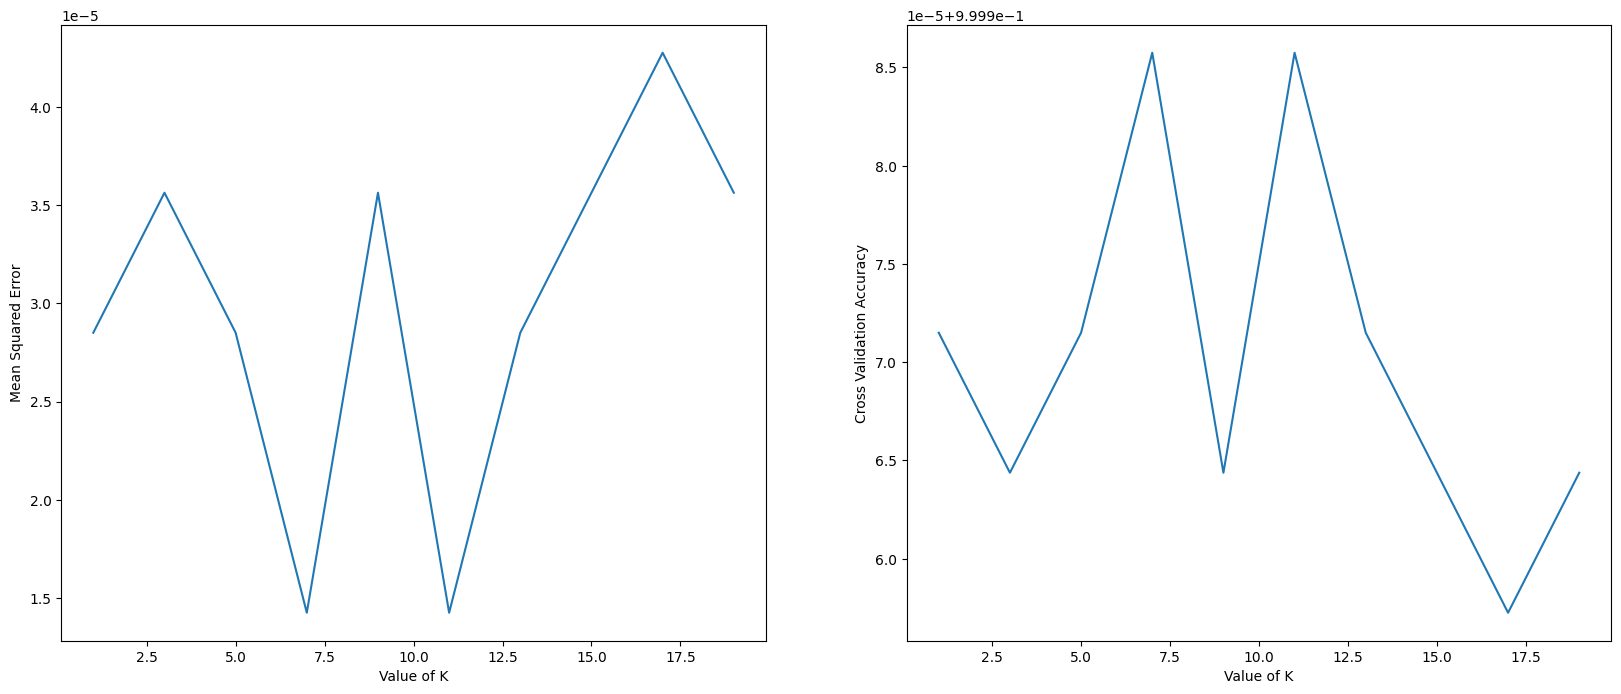

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(x=k_range,y=mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(x=k_range,y=scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

evaluate(knn_clf, X_test, y_test)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15380
           1       1.00      1.00      1.00     19708

    accuracy                           1.00     35088
   macro avg       1.00      1.00      1.00     35088
weighted avg       1.00      1.00      1.00     35088



In [ ]:
model_RFC = RandomForestClassifier()

In [ ]:
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
clf_rfc_cv = GridSearchCV(model_RFC, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 2, 'n_estimators': 30}
accuracy : 1.0


In [ ]:
#Fitting model

rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_train,y_train)

evaluate(RFC_clf, X_test, y_test)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15380
           1       1.00      1.00      1.00     19708

    accuracy                           1.00     35088
   macro avg       1.00      1.00      1.00     35088
weighted avg       1.00      1.00      1.00     35088



In [ ]:
model_ANN = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),

    Dense(16, activation='relu'),

    Dense(8, activation='relu'),

    Dense(1, activation='sigmoid')
])

model_ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 737 (2.88 KB)
Trainable params: 737 (2.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else np.array(X_train)
y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)


In [ ]:
import numpy as np

if isinstance(X_train, pd.DataFrame) or isinstance(X_train, pd.Series):
    X_train = X_train.values
if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
    y_train = y_train.values


In [ ]:
history = model_ANN.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
1755/1755 [==============================] - 11s 4ms/step - loss: 0.1465 - accuracy: 0.9608 - val_loss: 0.0227 - val_accuracy: 0.9996
Epoch 2/50
1755/1755 [==============================] - 5s 3ms/step - loss: 0.0179 - accuracy: 0.9961 - val_loss: 0.0133 - val_accuracy: 0.9975
Epoch 3/50
1755/1755 [==============================] - 5s 3ms/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.0092 - val_accuracy: 0.9981
Epoch 4/50
1755/1755 [==============================] - 5s 3ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0079 - val_accuracy: 0.9975
Epoch 5/50
1472/1755 [========================>.....] - ETA: 0s - loss: 0.0078 - accuracy: 0.9977

In [ ]:
y_pred = model_ANN.predict(X_test)
y_pred = (y_pred > 0.5)

1097/1097 [==============================] - 2s 1ms/step


In [ ]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n       False       1.00      1.00      1.00     15395\n        True       1.00      1.00      1.00     19693\n\n    accuracy                           1.00     35088\n   macro avg       1.00      1.00      1.00     35088\nweighted avg       1.00      1.00      1.00     35088\n'

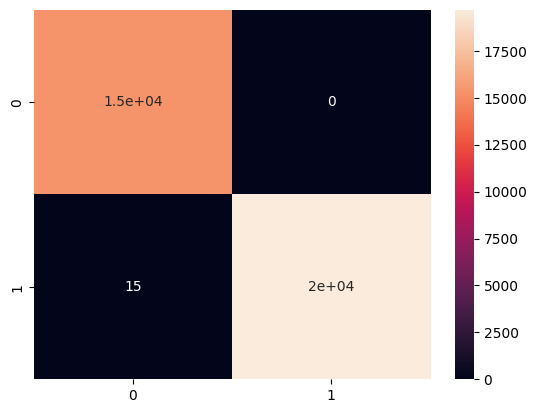

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
print(X.shape)


(175436,)


In [ ]:
if X.ndim == 1:
    X = X.reshape(-1, 1)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [ ]:
X

array([[0.        ],
       [0.78019132],
       [0.67500859],
       ...,
       [0.65855226],
       [0.43877137],
       [0.66273031]])

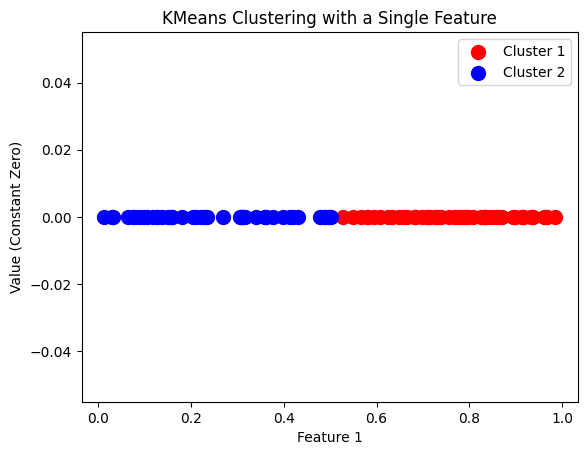

In [ ]:
#Scatter plot with a single feature
from sklearn.cluster import KMeans

# Example data with a single feature
X = np.random.rand(100, 1)

# Fit and predict with KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Scatter plot with a single feature
plt.scatter(X[y_kmeans == 0], np.zeros_like(X[y_kmeans == 0]), s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1], np.zeros_like(X[y_kmeans == 1]), s=100, c='blue', label='Cluster 2')
plt.xlabel('Feature 1')
plt.ylabel('Value (Constant Zero)')
plt.legend()
plt.title('KMeans Clustering with a Single Feature')
plt.show()


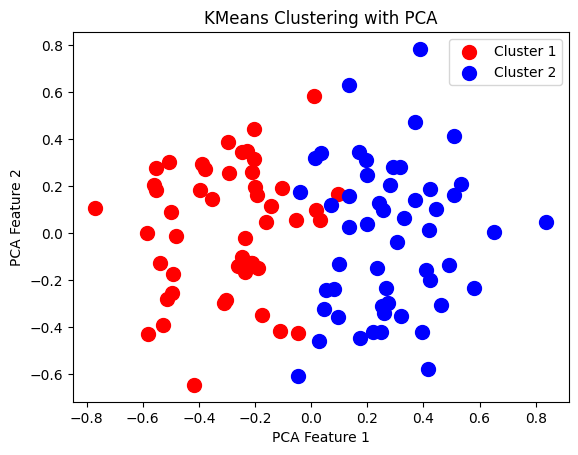

In [ ]:
# OR
#Using PCA for dimensionality reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Example data with multiple features
X = np.random.rand(100, 5)  # Assuming multiple features for demonstration

# Fit and predict with KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot with PCA-reduced features
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.title('KMeans Clustering with PCA')
plt.show()
